In [2]:
#1 - Import the data
#2 - Clean the data
#3 - Split data. Training Set/Test Set
#4 - Create a Model 
#5 - Check the output
#6 - Improve

import pandas as pd
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df1 = pd.DataFrame(df, columns=['Name', 'Wage', 'Value'])
df1.Wage = df1.Wage.apply(lambda x: x.replace('€', '') if x else None)
df1.Value = df1.Value.apply(lambda x: x.replace('€', '') if x else None)
df1.Wage = df1.Wage.apply(value_to_float)
df1.Value = df1.Value.apply(value_to_float)
df1['Difference'] = df1.Value - df1.Wage
df1.sort_values('Difference', ascending=False, inplace=True)
df1.head()

,Name,Wage,Value,Difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0


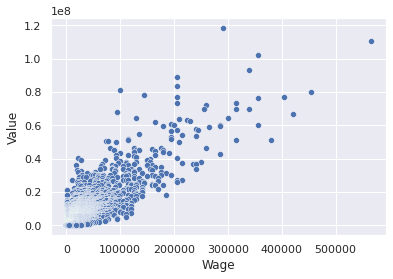

In [5]:
sns.set()
graph = sns.scatterplot(x='Wage', y='Value', data=df1)

In [6]:
hover=HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "($x, $y)"),
    ("Name", "@Name"),
])

p = figure(title='Soccer 2019', x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[hover])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)